In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv("./Final_Datset/final_co2.csv")
df.head()

,country,year,co2
0,Armenia,1830,0.000
1,Armenia,1952,1.783
2,Armenia,1953,1.885
3,Armenia,1954,2.057
4,Armenia,1955,2.333


In [3]:
india = df.loc[df['country'] == "India"]
india = india.sort_values(by='year')

In [4]:
india['year'] = pd.to_datetime(india['year'], format='%Y')


In [5]:
india.drop('country',axis=1,inplace=True)
india

,year,co2
4799,1858-01-01,0.395
4800,1859-01-01,0.637
4801,1860-01-01,0.644
4802,1861-01-01,0.498
4803,1862-01-01,0.551
...,...,...
4746,2016-01-01,2382.223
4747,2017-01-01,2433.856
4748,2018-01-01,2599.806
4749,2019-01-01,2625.968


In [6]:
india.columns = ['ds','y']
india

,ds,y
4799,1858-01-01,0.395
4800,1859-01-01,0.637
4801,1860-01-01,0.644
4802,1861-01-01,0.498
4803,1862-01-01,0.551
...,...,...
4746,2016-01-01,2382.223
4747,2017-01-01,2433.856
4748,2018-01-01,2599.806
4749,2019-01-01,2625.968


In [7]:
m = Prophet(interval_width=0.95)

In [8]:
training_run = m.fit(india)

21:20:28 - cmdstanpy - INFO - Chain [1] start processing
21:20:28 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=10,freq='Y')
future

,ds
0,1858-01-01
1,1859-01-01
2,1860-01-01
3,1861-01-01
4,1862-01-01
...,...
168,2025-12-31
169,2026-12-31
170,2027-12-31
171,2028-12-31


In [10]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1858-01-01,33.503675,-188.735262,150.746523,33.503675,33.503675,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,0.0,0.0,0.0,-13.720397
1,1859-01-01,34.254910,-175.238877,146.787577,34.254910,34.254910,-47.774875,-47.774875,-47.774875,-47.774875,-47.774875,-47.774875,0.0,0.0,0.0,-13.519965
2,1860-01-01,35.006145,-181.068556,150.142817,35.006145,35.006145,-48.100483,-48.100483,-48.100483,-48.100483,-48.100483,-48.100483,0.0,0.0,0.0,-13.094338
3,1861-01-01,35.759438,-158.149759,161.135043,35.759438,35.759438,-46.449021,-46.449021,-46.449021,-46.449021,-46.449021,-46.449021,0.0,0.0,0.0,-10.689583
4,1862-01-01,36.510673,-180.356960,142.004110,36.510673,36.510673,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,-47.224072,0.0,0.0,0.0,-10.713399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-12-31,2776.075558,2568.383234,2886.813811,2754.264170,2800.604949,-45.319684,-45.319684,-45.319684,-45.319684,-45.319684,-45.319684,0.0,0.0,0.0,2730.755874
169,2026-12-31,2836.949731,2635.970358,2956.148098,2810.365399,2868.297297,-44.074215,-44.074215,-44.074215,-44.074215,-44.074215,-44.074215,0.0,0.0,0.0,2792.875516
170,2027-12-31,2897.823905,2689.640713,3016.013127,2863.219381,2936.587089,-42.609597,-42.609597,-42.609597,-42.609597,-42.609597,-42.609597,0.0,0.0,0.0,2855.214308
171,2028-12-31,2958.864856,2749.255145,3081.685905,2915.958982,3005.703065,-46.343931,-46.343931,-46.343931,-46.343931,-46.343931,-46.343931,0.0,0.0,0.0,2912.520926


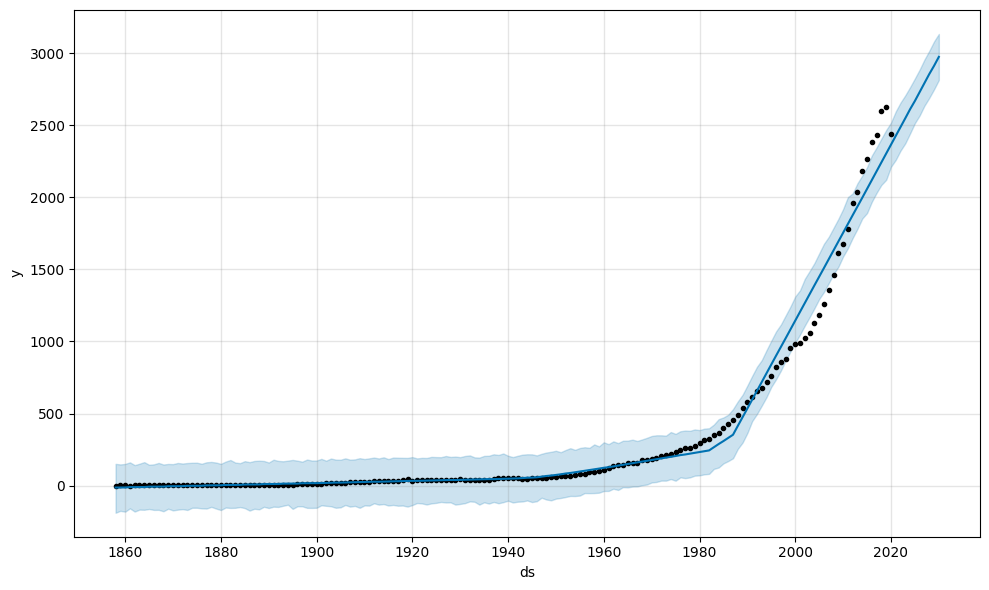

In [11]:
plot1 = m.plot(forecast)

In [12]:
import math
import sklearn.metrics
y_true = india['y'].values
y_pred = forecast['yhat'][:163].values
mse = sklearn.metrics.mean_squared_error(y_true, y_pred) 
rmse = math.sqrt(mse)
rmse

82.67230324104781

The Root Mean Squared Error of Prophet Forecast is 82.672

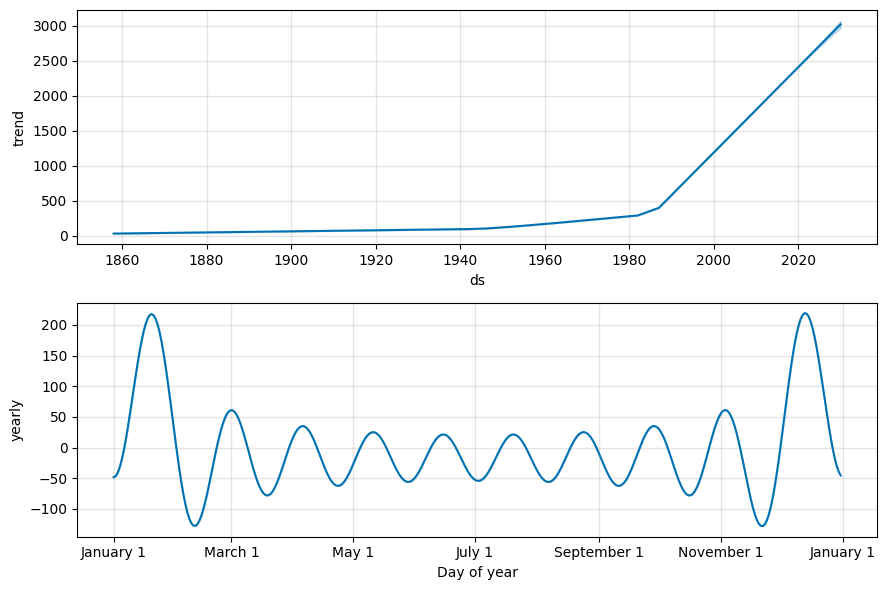

In [13]:
plot2 = m.plot_components(forecast)